In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#loading the dataset
df = pd.read_excel("GasByPlan.xlsx")

In [3]:
#Getting the first 5 data of the datasets
df.head()
new_df = df.drop(columns=["Total Usage"])

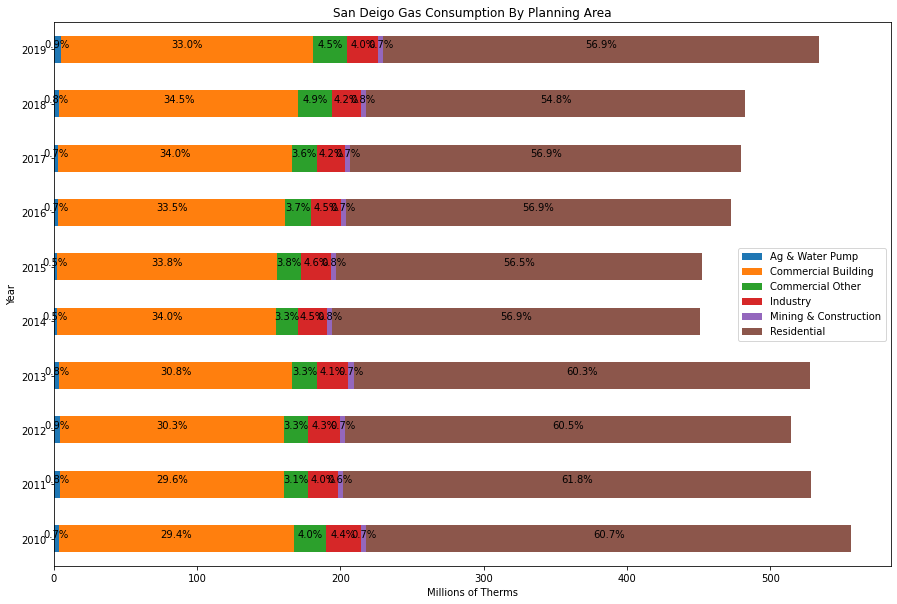

In [4]:
# plot a Stacked Bar Chart using matplotlib
new_df.plot(
    figsize=(15,10),
    x = 'Year',
    kind = 'barh',
    stacked = True,
    title = 'San Deigo Gas Consumption By Planning Area',
    mark_right = True)

# x details
plt.xlabel('Millions of Therms')

df_total = df["Total Usage"]
new_df_rel = new_df[new_df.columns[2:]].div(df_total, 0)*100

  
for n in new_df_rel:
    for i, (cs, ab, pc) in enumerate(zip(new_df.iloc[:, 2:].cumsum(1)[n], 
                                         new_df[n], new_df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'bottom', ha = 'center')

In [5]:
import folium
map = folium.Map(location=[32.7157, -117.1611], default_zoom_start=15)

In [25]:
gas_consumption = pd.read_csv("SDGE-GAS-2020-Q4.csv")

In [28]:
gas_consumption.head()

ZipCode  Month  Year CustomerClass Combined  TotalCustomers  TotalTherms  \
0    91901     10  2020             C        Y               0            0   
1    91901     10  2020             R        Y            2278        43245   
2    91902     10  2020             C        Y               0            0   
3    91902     10  2020             R        N            5139       102464   
4    91905     10  2020             C        Y               0            0   

   AverageTherms  
0              0  
1             19  
2              0  
3             20  
4              0

In [38]:
import json
import requests
import folium

#Setting up the URL
url = ("https://opendata.arcgis.com/datasets/41c3a7bd375547069a78fce90153cbc0_5.geojson")

#Get request to get the geojson
sd_zip = json.loads(requests.get(url).text)

#Setting up the map by indicating where to zoom in and how much to zoom in.
m = folium.Map([32.7157, -117.1611], zoom_start=9)

#Adding the geojson data to the map to see the zipcode
folium.GeoJson(geo_json_data).add_to(m)


In [49]:
m = folium.Map([32.7157, -117.1611], zoom_start=10)

choropleth = folium.Choropleth(
    geo_data=sd_zip,
    data= gas_consumption,
    columns=["ZipCode", "TotalTherms"],
    key_on="feature.properties.ZIP",
    nan_fill_color="black",
    nan_fill_opacity=1.0,
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Gas Consumption (TotalTherms)",
).add_to(m)

# The underlying GeoJson and StepColormap objects are reachable
print(type(choropleth.geojson))
print(type(choropleth.color_scale))

folium.LayerControl(collapsed=True).add_to(m)

m

<class 'folium.features.GeoJson'>
<class 'branca.colormap.StepColormap'>
